Device set to use cpu


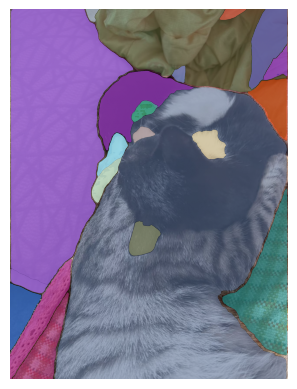

In [3]:
import os

# 设置从https://hf-mirror.com下载模型，否则会从huggingface.co下载
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from PIL import Image
import gc # 用于手动垃圾回收，释放内存

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()

def show_masks_on_image(raw_image, masks):
  plt.imshow(np.array(raw_image))
  ax = plt.gca()
  ax.set_autoscale_on(False)
  for mask in masks:
      show_mask(mask, ax=ax, random_color=True)
  plt.axis("off")
  plt.show()
  del mask
  gc.collect()

generator = pipeline("mask-generation", model="facebook/sam-vit-large")

raw_image = Image.open(r"C:\Users\-吕继亮\Desktop\2.jpg")
# plt.imshow(raw_image)

outputs = generator(raw_image, points_per_batch=128) 
# outputs["masks"]是一个tensor，形状为(num_masks, 1, h, w)，其中num_masks是检测到的mask数量，h和w是图像的高度和宽度。
masks = outputs["masks"] 
show_masks_on_image(raw_image, masks)

In [2]:
print(f"检测到的掩码数量: {len(outputs['masks'])}")

检测到的掩码数量: 24
